In [1]:
import os
import platform
import subprocess
import pandas as pd
import numpy

RUNS = 10

FILENAME = 'CMP.csv'

def system_info():
    print(os.name, platform.system(), platform.release())
    print(os.popen("clinfo | grep -B 2 -A 4 'Device Vendor ID'").read())
    print(os.popen("clinfo | grep NOTE -A 3").read())
    
# Creating Pandas DataFrame 
if os.path.isfile(FILENAME):
    df = pd.read_csv(FILENAME)
else:
    df = pd.DataFrame({"version": [], "platform": [], "execution_time_ms": []})
    
# List previous data
# List previous data (average)
df.groupby(['platform', 'version']) \
  .agg({'version':'count', 'execution_time_ms':'mean'}) \
  .rename(columns={'version':'count','version':'executions'})

executions  \
platform                                   version               
Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz   OpenMP           10   
                                           SYCL             10   
Intel(R) Iris(TM) Plus Graphics 640        OpenCL           10   
Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz OpenCL           10   
                                           OpenMP           10   
                                           SYCL             10   

                                                    execution_time_ms  
platform                                   version                     
Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz   OpenMP              2372.6  
                                           SYCL                 902.3  
Intel(R) Iris(TM) Plus Graphics 640        OpenCL               315.5  
Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz OpenCL               164.5  
                                           OpenMP               220.5  
                                           SYCL                 456.3

# MacBook Pro (13-inch, 2017)

In [2]:
system_info()

('posix', 'Darwin', '19.4.0')
  Device Name                                     Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  Device Vendor                                   Intel
  Device Vendor ID                                0xffffffff
  Device Version                                  OpenCL 1.2 
  Driver Version                                  1.1
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     CPU
--
--
  Device Name                                     Intel(R) Iris(TM) Plus Graphics 640
  Device Vendor                                   Intel Inc.
  Device Vendor ID                                0x1024500
  Device Version                                  OpenCL 1.2 
  Driver Version                                  1.2(Mar 15 2020 21:29:48)
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     GPU



# MacBook Pro (13-inch, 2017) + Docker

In [11]:
system_info()

posix Linux 4.19.76-linuxkit
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



# GPU-server (Hermes) + Docker (oneAPI)

In [13]:
system_info()

posix Linux 4.15.0-65-generic
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



## PC João ACER Aspire E 15

In [2]:
system_info()

posix Linux 5.3.0-62-generic
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.5.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.6.0.04
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU
--
  Device Name     

## OpenCL version

In [10]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-ocl2 -aph 600 -c0 1.98e-7 -c1 1.77e-6 -d 2 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "OpenCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## OpenMP version

In [7]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-omp2 -aph 600 -c0 1.98e-7 -c1 1.77e-6 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "OpenMP/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenMP"], 
                                 "platform"         : ["Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz"], 
                                 "execution_time_ms": [int(result[0])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## SYCL version (using Docker)

In [2]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-sycl2 -d 2 -aph 600 -c0 1.98e-7 -c1 1.77e-6 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "SYCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["SYCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

In [3]:
df

,execution_time_ms,platform,version
0,481.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
1,347.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
2,300.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
3,289.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
4,289.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
5,287.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
6,289.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
7,283.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
8,285.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
9,305.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL


Text(0, 0.5, 'Execution time (ms)')

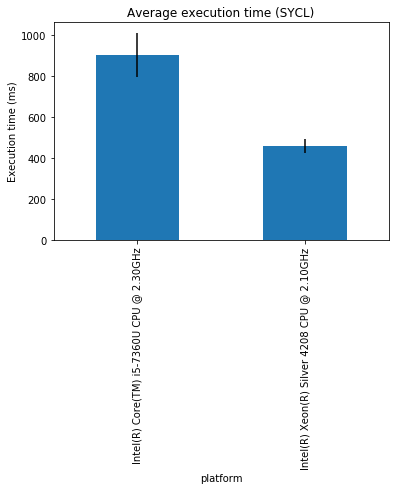

In [4]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df[df.version == 'SYCL'].groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (SYCL)")
plt.set_ylabel("Execution time (ms)")

Text(0, 0.5, 'Execution time (ms)')

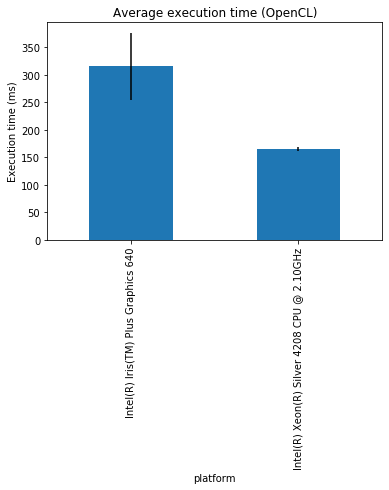

In [5]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df[df.version == 'OpenCL'].groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (OpenCL)")
plt.set_ylabel("Execution time (ms)")

Text(0, 0.5, 'Execution time (ms)')

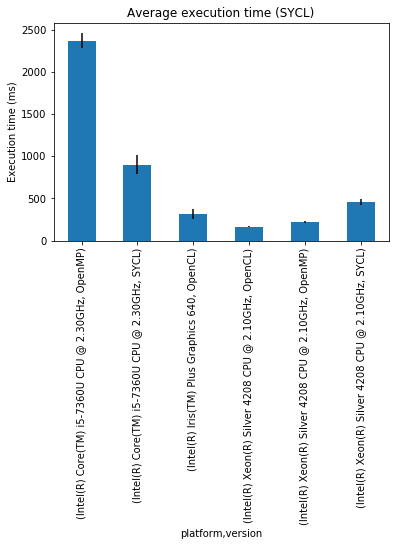

In [15]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df.groupby(['platform', 'version'])
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (SYCL)")
plt.set_ylabel("Execution time (ms)")

In [7]:
#===================================CREATE CMP DIRECTORY FOR IMAGES===================================
os.system("rm -r ../../datasets/CMP")
os.system("mkdir ../../datasets/CMP")
#---------------------------------------Generate OpenCL Images----------------------------------------
os.system("suoldtonew < OpenCL/build/cmp.c.su | supsimage > ../../datasets/CMP/ocl-cmp.c.eps")
os.system("suoldtonew < OpenCL/build/cmp.coher.su | supsimage > ../../datasets/CMP/ocl-cmp.coher.eps")
os.system("suoldtonew < OpenCL/build/cmp.stack.su | supsimage > ../../datasets/CMP/ocl-cmp.stack.eps")
#---------------------------------------Generate OpenMP Images----------------------------------------
os.system("suoldtonew < OpenMP/build/cmp.c.su | supsimage > ../../datasets/CMP/omp-cmp.c.eps")
os.system("suoldtonew < OpenMP/build/cmp.coher.su | supsimage > ../../datasets/CMP/omp-cmp.coher.eps")
os.system("suoldtonew < OpenMP/build/cmp.stack.su | supsimage > ../../datasets/CMP/omp-cmp.stack.eps")
#---------------------------------------Generate SYCL Images----------------------------------------
os.system("suoldtonew < SYCL/build/cmp.c.su | supsimage > ../../datasets/CMP/sycl-cmp.c.eps")
os.system("suoldtonew < SYCL/build/cmp.coher.su | supsimage > ../../datasets/CMP/sycl-cmp.coher.eps")
os.system("suoldtonew < SYCL/build/cmp.stack.su | supsimage > ../../datasets/CMP/sycl-cmp.stack.eps")

0